In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [8]:
dataset_train = pd.read_csv('Fiyatveri.csv',sep=';')
training_set= dataset_train.iloc[:, 1 :2].values

In [9]:
dataset_train

,Date,Price,Open,High,Low,Vol,Change %,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1.11.2010,0.2,0.20,0.20,0.20,0.20,0.00,NaN,NaN,NaN,1.�ub,NaN
1,2.11.2010,0.2,0.20,0.20,0.20,5.85,0.00,NaN,NaN,NaN,NaN,NaN
2,3.11.2010,0.2,0.20,0.30,0.10,61.47,0.00,NaN,NaN,NaN,NaN,NaN
3,4.11.2010,0.2,0.20,0.20,0.20,29.70,0.00,NaN,NaN,NaN,NaN,NaN
4,5.11.2010,0.3,0.20,0.30,0.20,36.62,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,26.12.2013,802.0,707.30,829.60,707.20,23.53,13.39,NaN,NaN,NaN,NaN,NaN
1152,27.12.2013,803.0,802.00,836.80,767.90,13.89,0.13,NaN,NaN,NaN,NaN,NaN
1153,28.12.2013,762.0,803.00,806.00,715.60,13.34,-5.11,NaN,NaN,NaN,NaN,NaN
1154,29.12.2013,785.0,762.00,804.00,735.00,7.04,3.01,NaN,NaN,NaN,NaN,NaN


In [10]:
sc= MinMaxScaler(feature_range = (0 , 1))
training_set_scaled =sc.fit_transform(training_set)

In [11]:
X_train = []
y_train =[]
for i in range (60,1156):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train , y_train =np.array(X_train), np.array(y_train)

In [12]:
X_train =np.reshape(X_train,(X_train.shape[0] , X_train.shape[1] , 1 ))

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50  , return_sequences = True , input_shape = (X_train.shape[1] , 1)     ))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50  , return_sequences = True  ))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50  , return_sequences = True  ))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units= 1))

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
35/35 [==============================] - 13s 125ms/step - loss: 0.0066
Epoch 2/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0036
Epoch 3/100
35/35 [==============================] - 5s 133ms/step - loss: 0.0032
Epoch 4/100
35/35 [==============================] - 4s 128ms/step - loss: 0.0025
Epoch 5/100
35/35 [==============================] - 4s 128ms/step - loss: 0.0019
Epoch 6/100
35/35 [==============================] - 4s 127ms/step - loss: 0.0019
Epoch 7/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0019
Epoch 8/100
35/35 [==============================] - 4s 126ms/step - loss: 0.0013
Epoch 9/100
35/35 [==============================] - 4s 126ms/step - loss: 0.0012
Epoch 10/100
35/35 [==============================] - 4s 126ms/step - loss: 0.0012
Epoch 11/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0010
Epoch 12/100
35/35 [==============================] - 4s 126ms/step - loss: 0.0014
Epoch 13/100

35/35 [==============================] - 5s 133ms/step - loss: 6.5237e-04
Epoch 96/100
35/35 [==============================] - 4s 128ms/step - loss: 8.9625e-04
Epoch 97/100
35/35 [==============================] - 4s 125ms/step - loss: 6.2562e-04
Epoch 98/100
35/35 [==============================] - 4s 126ms/step - loss: 6.9150e-04
Epoch 99/100
35/35 [==============================] - 4s 128ms/step - loss: 5.3052e-04
Epoch 100/100
35/35 [==============================] - 4s 127ms/step - loss: 5.7055e-04


In [21]:
dataset_test = pd.read_csv('testBitcoin.csv',sep=';')
real_stock_price= dataset_test.iloc[:, 1 :2].values

In [22]:
real_stock_price

array([[ 954.8],
       [ 905.7],
       [ 894.2],
       [ 913.5],
       [ 941.2],
       [ 919.3],
       [ 922.9],
       [ 939.8],
       [1005.3],
       [ 957.8],
       [ 937. ],
       [ 938.8],
       [ 879.9],
       [1012.7],
       [1014.7],
       [ 924.7],
       [ 884.3],
       [ 856.9],
       [ 815.9],
       [ 805.9]])

In [23]:
dataset_total=pd.concat((dataset_train['Price'],dataset_test['Price']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [24]:
X_test= []
for i in range (60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0] , X_test.shape[1] , 1 ))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform (predicted_stock_price)

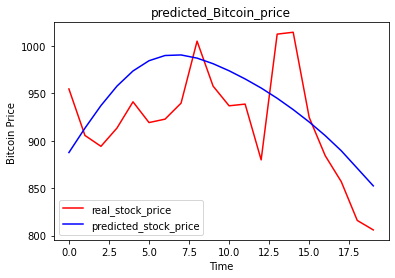

In [25]:
plt.plot(real_stock_price,color = 'red' ,label ='real_stock_price')

plt.plot(predicted_stock_price,color = 'blue' ,label ='predicted_stock_price')

plt.title ('predicted_Bitcoin_price')

plt.xlabel('Time')

plt.ylabel('Bitcoin Price ')

plt.legend()

plt.show()


In [26]:
real_stock_price.corr(predicted_stock_price)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'